In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

from matplotlib.cbook import boxplot_stats
sb.set() # set the default Seaborn style for graphics

In [2]:
traind = pd.read_csv('train.csv')
traind.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Problem 1

In [3]:
#a Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?


# Extract only the numeric data variables
traindf = pd.DataFrame(traind[["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea","SalePrice"]])

# Summary Statistics for all Variables
traindf.describe().round(2)



,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,1515.46,1057.43,472.98,180921.2
std,9981.26,525.48,438.71,213.80,79442.5
min,1300.00,334.00,0.00,0.00,34900.0
25%,7553.50,1129.50,795.75,334.50,129975.0
50%,9478.50,1464.00,991.50,480.00,163000.0
75%,11601.50,1776.75,1298.25,576.00,214000.0
max,215245.00,5642.00,6110.00,1418.00,755000.0


Number of outliers for LotArea:  69
Number of outliers for GrLivArea:  31
Number of outliers for TotalBsmtSF:  61
Number of outliers for GarageArea:  21


<AxesSubplot:>

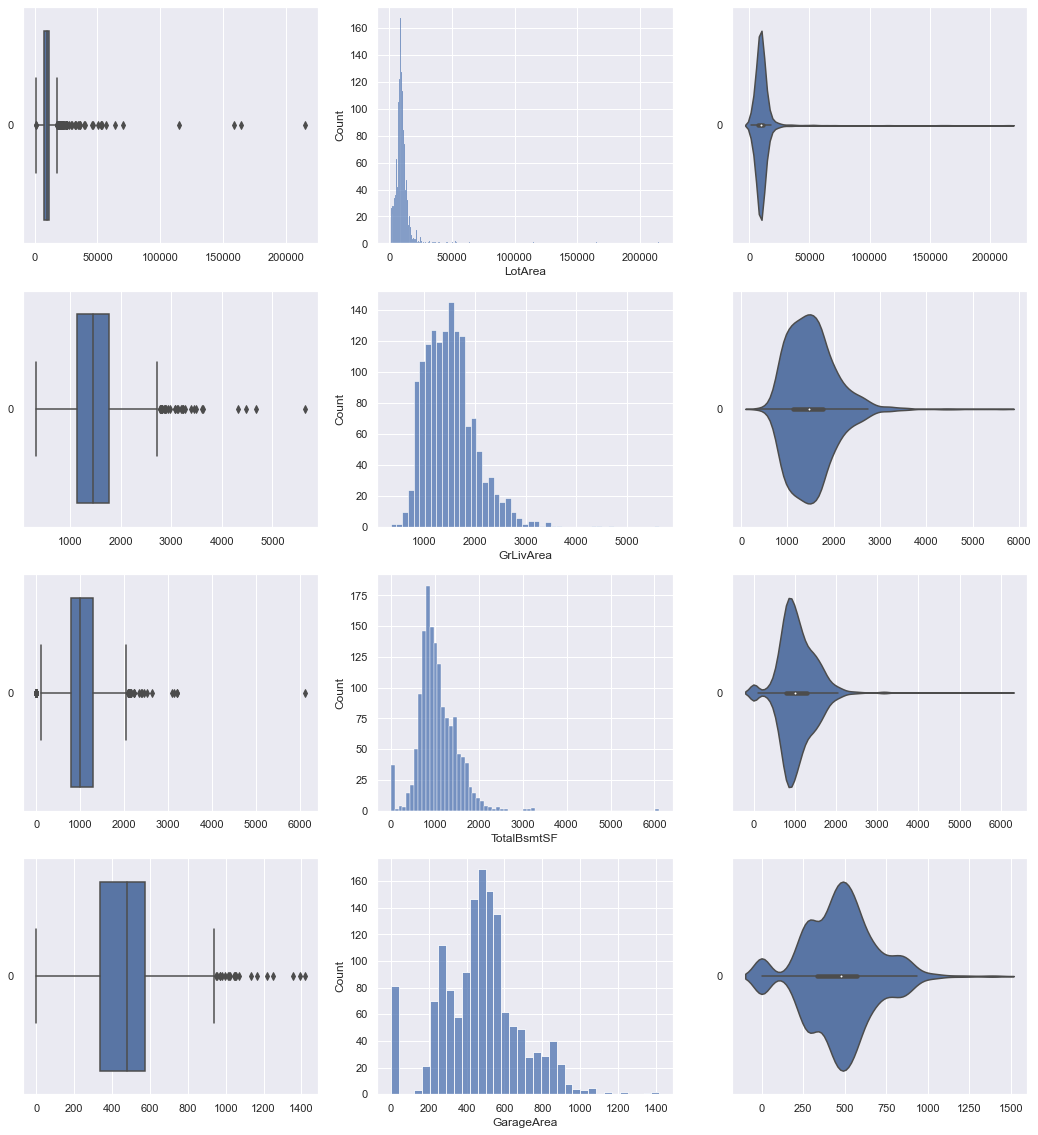

In [26]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))

outliers = [y for stat in boxplot_stats(traindf["LotArea"]) for y in stat['fliers']]
print("Number of outliers for LotArea: ",len(outliers))
outliers = [y for stat in boxplot_stats(traindf["GrLivArea"]) for y in stat['fliers']]
print("Number of outliers for GrLivArea: ",len(outliers))
outliers = [y for stat in boxplot_stats(traindf["TotalBsmtSF"]) for y in stat['fliers']]
print("Number of outliers for TotalBsmtSF: ",len(outliers))
outliers = [y for stat in boxplot_stats(traindf["GarageArea"]) for y in stat['fliers']]
print("Number of outliers for GarageArea: ",len(outliers))

sb.boxplot(data = traindf["LotArea"], orient = "h", ax = axes[0,0])
sb.histplot(data = traindf["LotArea"], ax = axes[0,1])
sb.violinplot(data = traindf["LotArea"], orient = "h", ax = axes[0,2])

sb.boxplot(data = traindf["GrLivArea"], orient = "h", ax = axes[1,0])
sb.histplot(data = traindf["GrLivArea"], ax = axes[1,1])
sb.violinplot(data = traindf["GrLivArea"], orient = "h", ax = axes[1,2])

sb.boxplot(data = traindf["TotalBsmtSF"], orient = "h", ax = axes[2,0])
sb.histplot(data = traindf["TotalBsmtSF"], ax = axes[2,1])
sb.violinplot(data = traindf["TotalBsmtSF"], orient = "h", ax = axes[2,2])

sb.boxplot(data = traindf["GarageArea"], orient = "h", ax = axes[3,0])
sb.histplot(data = traindf["GarageArea"], ax = axes[3,1])
sb.violinplot(data = traindf["GarageArea"], orient = "h", ax = axes[3,2])

In [28]:
traindf.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

#### ans Q1a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?
Largest LotArea 69, which can be seen in the box plot the number of outliner after the Q3 


#### ans Q1b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

LotArea 12.208 skew value 
Positive Skew



              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

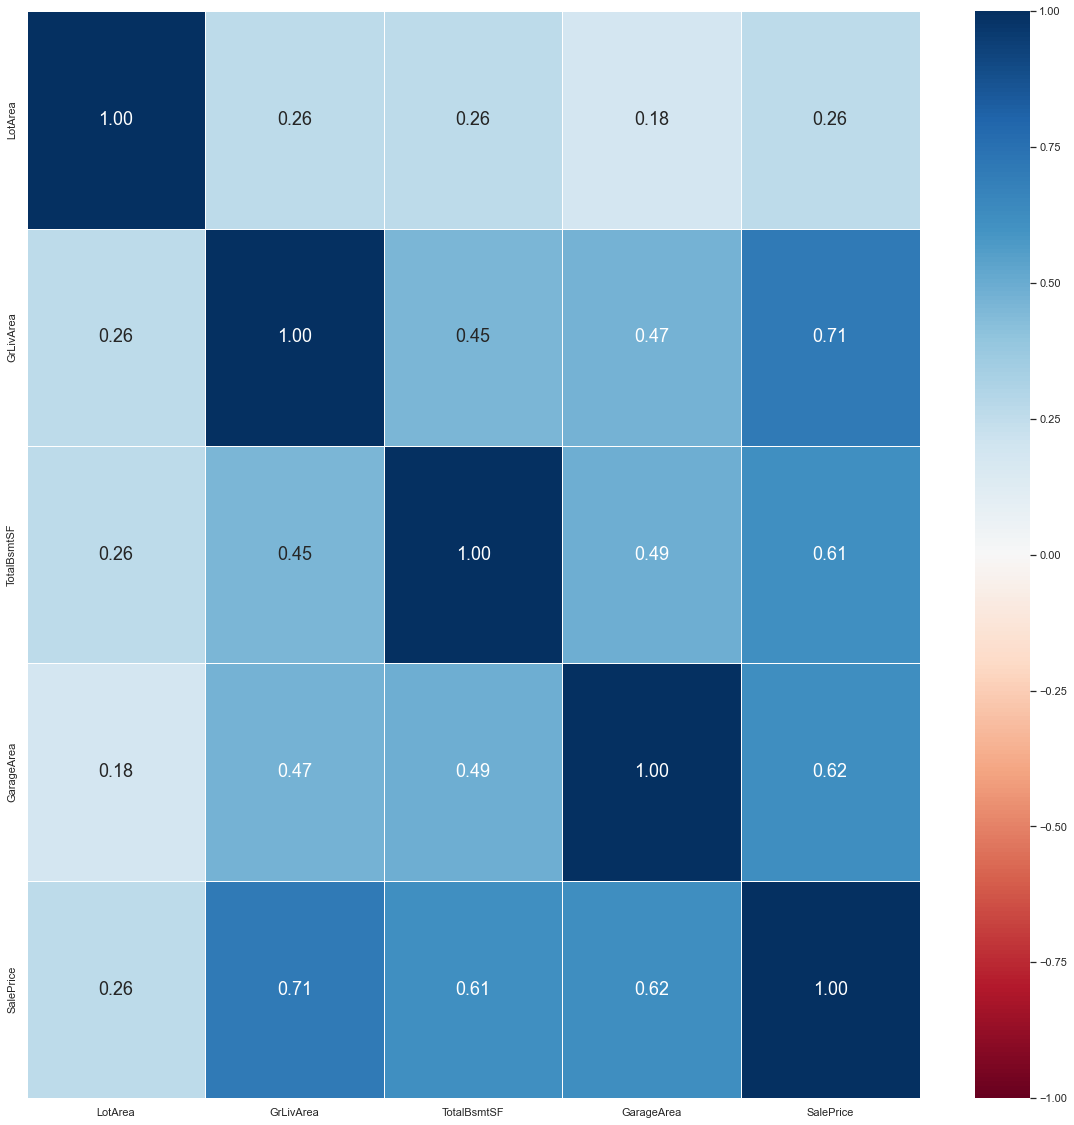

In [6]:
# Correlation Matrix
print(traindf.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(traindf.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

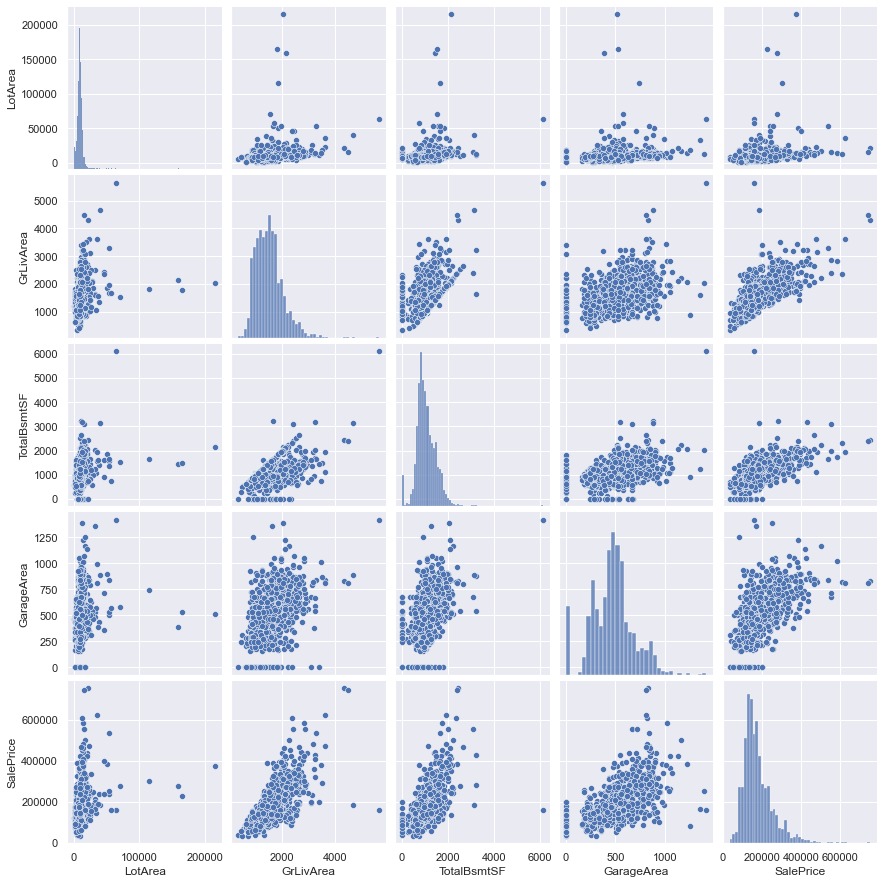

In [7]:
# Draw pairs of variables against one another
sb.pairplot(data = traindf)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


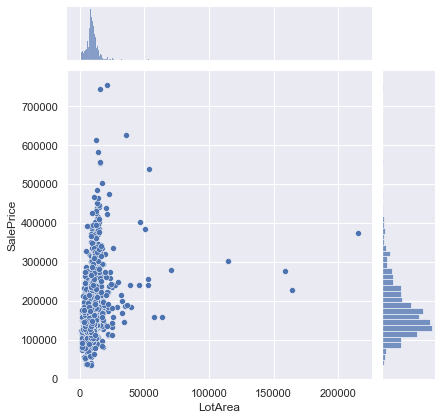

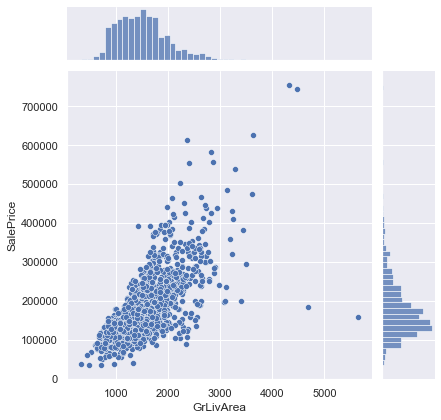

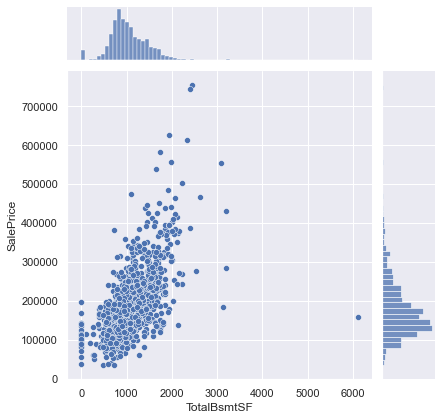

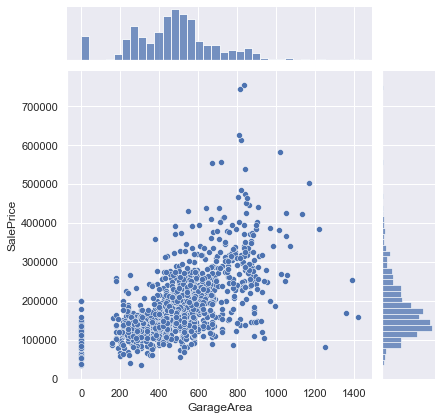

In [26]:
sb.jointplot(data=traindf, x="LotArea", y="SalePrice")
sb.jointplot(data=traindf, x="GrLivArea", y="SalePrice")
sb.jointplot(data=traindf, x="TotalBsmtSF", y="SalePrice")
sb.jointplot(data=traindf, x="GarageArea", y="SalePrice")

traindf.corr(method ='pearson')

#### ans Q1c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

GrLivArea and GarageArea as they have a better correlation value when plot with SalePrice

GrLivArea vs SalePrice = 0.71

GarageArea vs SalePrice = 0.62


### Problem 2

In [4]:
traindp2 = pd.DataFrame(traind[["MSSubClass", "Neighborhood", "BldgType", "OverallQual","SalePrice"]])
# Summary Statistics for all Variables
traindp2

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000
...,...,...,...,...,...
1455,60,Gilbert,1Fam,6,175000
1456,20,NWAmes,1Fam,6,210000
1457,70,Crawfor,1Fam,7,266500
1458,20,NAmes,1Fam,5,142125


Unique elements in MSSubClass :  15
Unique elements in Neighborhood:  25
Unique elements in BldgType :  5
Unique elements in OverallQual :  10


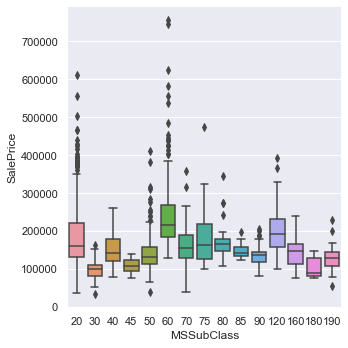

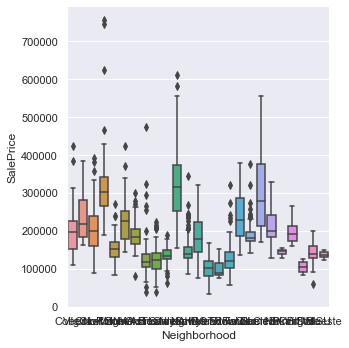

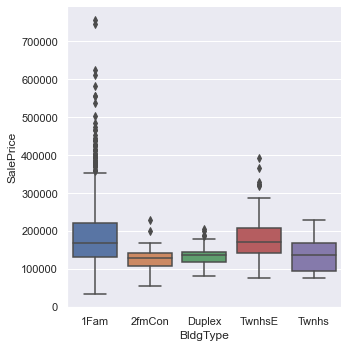

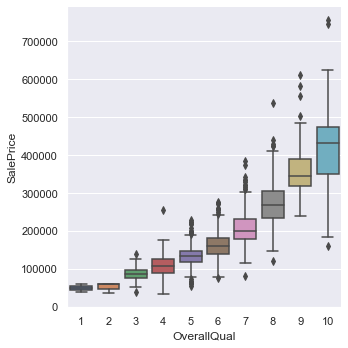

In [9]:
print("Unique elements in MSSubClass : ",len(traindp2["MSSubClass"].unique()))
print("Unique elements in Neighborhood: ",len(traindp2["Neighborhood"].unique()))
print("Unique elements in BldgType : ",len(traindp2["BldgType"].unique()))
print("Unique elements in OverallQual : ",len(traindp2["OverallQual"].unique()))

sb.catplot(x="MSSubClass", y="SalePrice", kind="box", data=traindp2)
sb.catplot(x="Neighborhood", y="SalePrice", kind="box", data=traindp2)
sb.catplot(x="BldgType", y="SalePrice", kind="box", data=traindp2)
sb.catplot(x="OverallQual", y="SalePrice", kind="box", data=traindp2)

In [34]:
pd.value_counts(traindp2["MSSubClass"])

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [35]:
pd.value_counts(traindp2["Neighborhood"])

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [36]:

pd.value_counts(traindp2["BldgType"])

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [37]:

pd.value_counts(traindp2["OverallQual"])

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

#### ans Q2a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

Neighborhood with 25 levels and NAmes      225


#### ans Q2b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

OverallQual as the plot clearly indicates that the increase in overall quality mean increase in sale price

and

Neighborhood as there are variety of value

### Problem 3

Hints and Pointers

1 Check the data_description file very carefully and pick the variables you want to work with for these problems.

2 In some cases, it is alright to create new variables out of the original ones, especially if they help you analyze.

3 Do keep an eye out for missing values in the variables that you tackle and see what you can make out of those.

In [42]:
traingarage = pd.DataFrame(traind[["GarageType","GarageArea","SalePrice"]])
traingarage["Garage"]  = np.where(traingarage["GarageArea"]>0, 'yes', 'no')

traingarage

,GarageType,GarageArea,SalePrice,Garage
0,Attchd,548,208500,yes
1,Attchd,460,181500,yes
2,Attchd,608,223500,yes
3,Detchd,642,140000,yes
4,Attchd,836,250000,yes
...,...,...,...,...
1455,Attchd,460,175000,yes
1456,Attchd,500,210000,yes
1457,Attchd,252,266500,yes
1458,Attchd,240,142125,yes


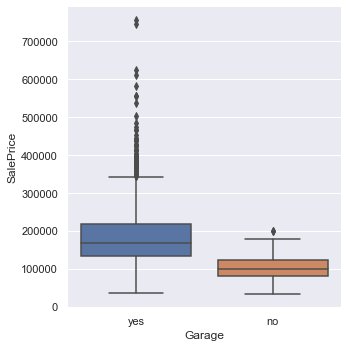

In [43]:
sb.catplot(x="Garage", y="SalePrice", kind="box", data=traingarage)

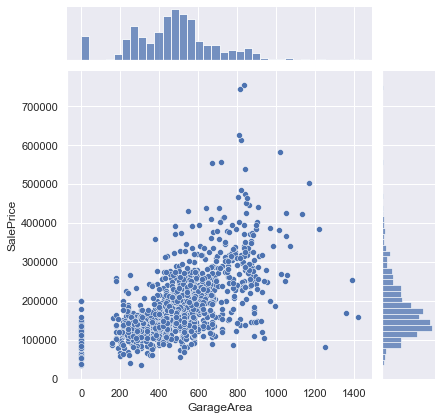

In [12]:

sb.jointplot(data=traingarage, x="GarageArea", y="SalePrice")

#### ans Q3a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

Yes, as factor such as
GarageFinish and GarageArea affect the sales price

In [ ]:
#b Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

In [ ]:
#Spare


# Draw the distributions of all variables
#f, axes = plt.subplots(3, 3, figsize=(18, 20))

#sb.boxplot(data = traingarage["GarageType"], orient = "h", ax = axes[0,0])
#sb.histplot(data = traingarage["GarageType"], ax = axes[0,1])
#sb.violinplot(data = traingarage["GarageType"], orient = "h", ax = axes[0,2])

#sb.boxplot(data = traingarage["GarageFinish"], orient = "h", ax = axes[1,0])
#sb.histplot(data = traingarage["GarageFinish"], ax = axes[1,1])
#sb.violinplot(data = traingarage["GarageFinish"], orient = "h", ax = axes[1,2])

#sb.boxplot(data = traingarage["GarageArea"], orient = "h", ax = axes[2,0])
#sb.histplot(data = traingarage["GarageArea"], ax = axes[2,1])
#sb.violinplot(data = traingarage["GarageArea"], orient = "h", ax = axes[2,2])

#sb.boxplot(data = traingarage["GarageQual"], orient = "h", ax = axes[3,0])
#sb.histplot(data = traingarage["GarageQual"], ax = axes[3,1])
#sb.violinplot(data = traingarage["GarageQual"], orient = "h", ax = axes[3,2])

#sb.boxplot(data = traingarage["GarageCond"], orient = "h", ax = axes[4,0])
#sb.histplot(data = traingarage["GarageCond"], ax = axes[4,1])
#sb.violinplot(data = traingarage["GarageCond"], orient = "h", ax = axes[4,2])